italicized text# Randomized Response and Differential Privacy

In class, we discussed an example of randomized response. We introduced a 'coin-flipping' method for introducing noise to responses of the question "Have you ever cheated on an exam?" To answer this question, respondents would use the following procedure:

1. Flip a coin **C1**
  1. if C1 is heads, then **respond truthfully**
  2. if C1 is tails, then flip another coin **C2**
    1. if C2 is heads then respond **No**
    2. if C2 is tails then respond **Yes**

This algorithm is an example of localized random response (i.e., noise is added when the data is collected).

In this notebook, you will work through this 'coin-flipping' method. Then you will modify our randomized response algorithm to see how this affects privacy guarantees.


## Setup

Import necessary packages.

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Randomized response algorithm 1

<img src="https://drive.google.com/uc?export=view&id=1NEP2dOjcIImisdEaGgRDg08lSlXtDYj1" width="700">

Below we define a function for our 'coin-flipping' randomized response algorithm. This algorithm is depicted by the figure above. We set `truth='Yes'` as our default argument but it would also work with `Truth='No'`. Read through the code to make sure you understand how it works.



In [17]:
import random

def randomized_algorithm1(truth='Yes'):

  C1 = random.choice(['Heads', 'Tails'])

  if (C1 == 'Heads'):
    response = truth
  else:
    C2 = random.choice(['Heads', 'Tails'])
    if (C2 == 'Tails'):
      response = 'Yes'
    else:
      response = 'No'

  return response

Try running the algorithm (below) a few times. Double-check that you sometimes get "Yes" and sometimes get "No" responses.


In [43]:
randomized_algorithm1()

'No'

### Calculating epsilon, the privacy parameter

The randomized algorithm defined above provides a certain degree of privacy which we call epsilon. Below we will cover how to calculate epsilon.

#### Probability of "Yes" for a person whose true value is "Yes"

Let's start by taking the case where a person's true value is "Yes", i.e. `truth = 'Yes'`. How could that person end up answering "Yes" in the randomized algorithm above?

> 1. They could flip C1 and get heads, in which case they would answer with the truth, i.e. "Yes." Or;
> 2. They could flip C1 and get tails; then flip C2 and get tails again, in which case they would answer "Yes."

Calculate the probability of a person answering "Yes" given that the truth is "Yes":

In [19]:
P_C1_heads = 0.5
P_C1_tails = 0.5
P_C2_tails = 0.5

P_yes_given_yes = P_C1_heads + (P_C1_tails * P_C2_tails)
print(P_yes_given_yes)

0.75


#### Probability of "Yes" for a person whose true value is "No"

Now let's take the case where a person's true value is "No," i.e. `truth = 'No'`. How could that person end up answering 'Yes' based on the 'coin-flipping' randomized algorithm?

1. They could flip C1 and it returns tails; then flip C2 and get tails again, in which case they would answer "Yes."

Calculate the probability of a person answering "Yes" given that the truth is "No":

In [20]:
P_yes_given_no = P_C1_tails * P_C2_tails
print(P_yes_given_no)

0.25


#### Calculate epsilon for the first algorithm

Epsilon is calculated by taking the probability that a person answered "Yes" because the truth for that person was "Yes" and dividing it by the probability that a person answered "Yes" even though the truth was "No."

This captures the idea of **plausible deniability** which is foundational to differential privacy. A person could have answered "Yes" because they truthfully did cheat on an exam or they could have answered "Yes" because they flipped a certain coin combination. We can't know which route led the person to answering "Yes" by looking only at their response.

In [21]:
epsilon = np.log(P_yes_given_yes / P_yes_given_no)
print("epsilon:", epsilon)

epsilon: 1.0986122886681098


Note that we take the natural log.

## Randomized response algorithm 2

<img src="https://drive.google.com/uc?export=view&id=1ELyGARwJnXtVtj9jLub11rJj6N_ejjnC" width="700">

Let's modify the 'coin-flipping' algorithm by introducing a third coin, **C3**. We'll define a new algorithm called `randomized_algorithm2` based on the above figure. Spend some time reviewing the below function so that you understand it.

In [22]:
def randomized_algorithm2(truth='Yes'):

  C1 = random.choice(['Heads', 'Tails'])

  if (C1 == 'Heads'):
    response = truth
  else:
    C2 = random.choice(['Heads', 'Tails'])
    if (C2 == 'Heads'):
      response = 'No'
    else:
      C3 = random.choice(['Heads', 'Tails'])
      if (C3 == 'Heads'):
        response = 'No'
      else:
        response = 'Yes'

  return response

Try running the new algorithm (below) a few times. Double-check that you sometimes get "Yes" and sometimes get "No" responses.

In [23]:
randomized_algorithm2()

'Yes'

### Calculate epsilon for algorithm 2

Think through the ways that a person whose true value is "Yes" could respond with "Yes" in the second algorithm. These are:

> 1. They could flip C1 and get heads in which case they would answer with the truth, i.e. "Yes." Or;
> 2. They could flip C1 and get tails; then flip C2 and get tails; then flip C3 and get tails for a third time in a row, in which case they would answer "Yes."

Again, calculate the probability of a person answering "Yes" given that the truth is "Yes":

In [24]:
P_C3_tails = 0.5

P_yes_given_yes2 = P_C1_heads + (P_C1_tails * P_C2_tails * P_C3_tails)
print(P_yes_given_yes2)

0.625


The probability of a person answering "Yes" given that the truth is "No" is also different in our second algorithm. The route to this answer is:

> 1. C1 tails; followed by C2 tails, followed by C3 tails



In [25]:
P_yes_given_no2 = P_C1_tails * P_C2_tails * P_C3_tails
print(P_yes_given_no2)

0.125


And now we can calculate epsilon for our second algorithm:

In [26]:
epsilon2 = np.log(P_yes_given_yes2 / P_yes_given_no2)
print("epsilon:", epsilon2)

epsilon: 1.6094379124341003


Recall that epsilon represents the strength of privacy from the algorithm, where a **lower value indicates stronger privacy**. Why is `epsilon2` for the second algorithm higher than `epsilon` from the first algorithm?

**Write your answer here and include your reasoning:**
epsilon is higher because when comparing the tails possibly for C2, algorithm 1 has no cases after tails, but algorithm 2 has another set of cases as C3. This lowers the strength of privacy and therefore epsilson is higher.

## Randomized response algorithm 3

<img src="https://drive.google.com/uc?export=view&id=1OFjubxvcx3s73NzoIMMD4tsrfCzIi6AM" width="700">

In the third and final randomized response algorithm, keep three coins but change the algorithm according to the figure above. Note that in the third algorithm, we will flip a coin after C1 no matter what. We'll either flip C2 or C3 depending on C1. That means that every respondent will be guaranteed to flip two coins.

The third algorithm is defined as follows:

In [27]:
def randomized_algorithm3(truth='Yes'):

  C1 = random.choice(['Heads', 'Tails'])

  if (C1 == 'Heads'):
    C2 = random.choice(['Heads', 'Tails'])
    if (C2 == 'Tails'):
      response = 'Yes'
    else:
      response = 'No'
  else:
    C3 = random.choice(['Heads', 'Tails'])
    if (C3 == 'Tails'):
      response = truth
    else:
      response = 'No'

  return response

Again, check that it works as anticipated:

In [28]:
randomized_algorithm3()

'Yes'

### Calculate epsilon for algorithm 3

Repeat the exercise from our first and second algorithm. What is the probability that a person will respond "Yes" given that the truth for that person is "Yes"?

**Write down the route(s) here:** 
C1 heads to C2 tails or C1 tails to c3 and answer the truth tails as YES


Calculate the probability of `yes_given_yes` (i.e. the probability that a person responds yes and the truth is yes):

In [46]:
# Write your code here:
P_yes_given_yes3 = (P_C1_heads * P_C2_tails) + (P_C1_tails * P_C3_tails)
print(P_yes_given_yes3)



0.5


What is the probability that a person will respond "Yes" given that the truth for that person is "No"?

**Write down the route(s) here:**
C1 Heads to C2 heads as No or C1 tails to C3 Heads as No

Calculate the probability of `yes_given_no` (i.e. the probability that a person responds yes even though the truth is no):

In [47]:
# Write your code here:
P_yes_given_no3 = (P_C1_heads * P_C3_tails) 
print(P_yes_given_no3)


0.25


Calculate epsilon by using the values `yes_given_yes` and `yes_given_no`:

In [48]:
# Write your code here:
epsilon3 = np.log(P_yes_given_yes3 / P_yes_given_no3)
print("epsilon:", epsilon3)

epsilon: 0.6931471805599453


What do you observe about epsilon for the third algorithm?

**Write your answer here:** Of the three algorithms, 3 has the strongest privacy compared to 1 and 2 likely due to the split of two coins for C1 being heads or tails.

## Example with data

In the first randomized algorithm (called `randomized_algorithm1`), we can estimate the proportion of responses for whom we expect the truth to be "Yes" by the formula:

> $\hat{p} = 2y - 0.5$

where $\hat{p}$ is the estimated proportion of respondents for whom Truth = Yes and $y$ is the proportion of respondents who say "Yes".

Suppose 100 students are asked to respond to our question "Have you ever cheated on an exam?". Also suppose that the truth is "Yes" for 30 of those students and "No" for the other 70. If we ask each student to respond via our first randomized algorithm, we would estimate the proportion of true "Yes" responses from our 100 students to be:

In [32]:
results = [randomized_algorithm1(truth=P) for P in ['Yes']*30 + ['No']*70]

(2 *(results.count('Yes') / 100) - 0.5)

0.31999999999999995

## Simulate the proportion of 'Yes' responses

The above is just a one-shot example. The estimate, $\hat{p}$, will vary each time we run the above cell because there's randomization involved.

Let's simulate the distribution of estimates for a population of 100 students responding using the randomization algorithm over and over again. We'll simulate the randomized response 10,000 times and estimate the proportion of "Yes" responses each time.

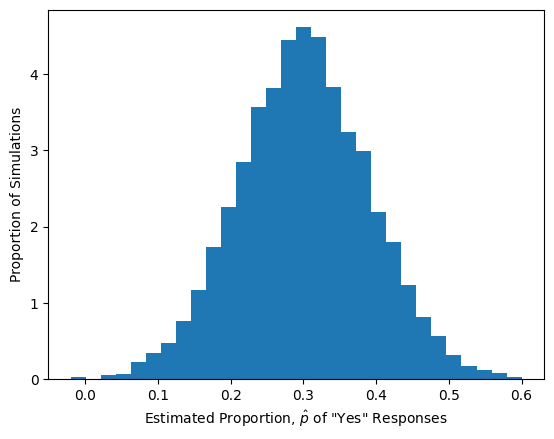

In [33]:
output = []*10000
for x in range(0, 10000):
  results = [randomized_algorithm1(truth=P) for P in ['Yes']*30 + ['No']*70]
  output.append(2 * (results.count('Yes') / 100) - 0.5)

plt.hist(output, density=True, bins=30)  # density=False would make counts
plt.ylabel('Proportion of Simulations')
plt.xlabel('Estimated Proportion, $\hat{p}$ of "Yes" Responses');


What do you observe from this distribution?

**Write your answer here:** It is normally distributed around 0.3 where it is most likely that the proportion of the population that responds yes is 0.3 frequently.

## Create your own randomized response algorithm

Come up with your own randomized response algorithm, write a function for it, calculate epsilon, and see how it works in practice. You can use the above examples as a template.

**Describe your randomized response algorithm here:**

In [68]:
# Write your algorithm code here.
results = [randomized_algorithm1(truth=P) for P in ['Yes']*45 + ['No']*55]

(2 *(results.count('Yes') / 100) - 0.45)


0.51

Try running your algorithm a few times to make sure you get both "Yes" and "No" responses.

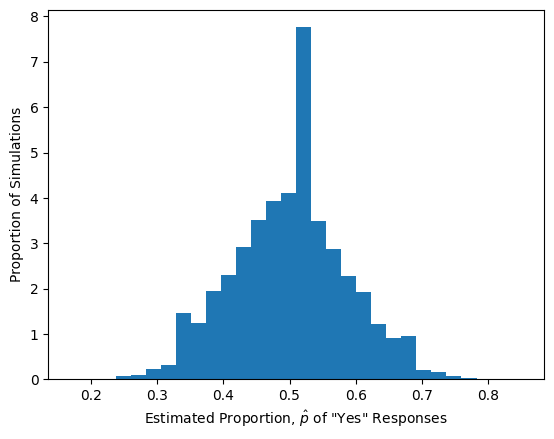

In [71]:
# Write your code here.
output = []*10000
for x in range(0, 10000):
  results = [randomized_algorithm1(truth=P) for P in ['Yes']*45 + ['No']*55]
  output.append(2 * (results.count('Yes') / 100) - 0.45)

plt.hist(output, density=True, bins=30)  # density=False would make counts
plt.ylabel('Proportion of Simulations')
plt.xlabel('Estimated Proportion, $\hat{p}$ of "Yes" Responses');


### Calculate epsilon for your algorithm

What are that routes to a person responding "Yes" given that the truth for that person is "Yes"?

**Write the route(s) here:** In this examples, if asked 100 students 45 students will say yes and 55 will say no. Routes would be they get C1 heads as the truth Yes or C1 tails to C2 Tails as Yes

What is the probability that a person will respond "Yes" given that the truth for that person is "Yes"?

In [72]:
# In this code cell - calculate the probability of `yes_given_yes':
P_C1_heads = 0.45
P_C1_tails = 0.55
P_C2_tails = 0.5

P_yes_given_yes4 = P_C1_heads + (P_C1_tails * P_C2_tails)
print(P_yes_given_yes)

0.7250000000000001


What are the route(s) to a "Yes" given the truth is "No"?

**Write the route(s) here:** They would get C1 Tails to C2 Tails

What is the probability that a person will respond "Yes" given that the truth for that person is "No"?

In [73]:
# Write your code here:
P_yes_given_no4 = P_C1_tails * P_C2_tails
print(P_yes_given_no)

0.25


Now calculate epsilon for your algorithm.

In [74]:
# Write your code here:
epsilon4 = np.log(P_yes_given_yes4 / P_yes_given_no4)
print("epsilon:", epsilon4)

epsilon: 0.9694005571881036


### Comparing algorithms

Compare the four algorithms (your algorithm + algorithm 1, 2, and 3 from this assignmnet) by ranking them from most private to least private. Which algorithm provides the most privacy? What does this mean in terms of the accuracy of the estimate, $\hat{p}$ when using each of the algorithms?

In [76]:
print("epsilon:", epsilon)
print("epsilon:", epsilon2)
print("epsilon:", epsilon3)
print("epsilon:", epsilon4)

epsilon: 1.0986122886681098
epsilon: 1.6094379124341003
epsilon: 0.6931471805599453
epsilon: 0.9694005571881036


**Write your answer here:**
Comparing my algorithm with the rest it seems that the ranking from most to least private is 3,4,1,2 where 3 is the most consistent provider of privacy. It shows that the algorithm that is most near a 50/50 proportion of yes and no's gives the strongest privacy.

Submit this notebook as an .ipynb file on Gradescope.